<a href="https://colab.research.google.com/github/Ayushpatil2004/Frontend-projects/blob/main/player_injury_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries for data manipulation and modeling components
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#Reading the dataset
df = pd.read_csv("collegiate_athlete_injury_dataset.csv")

In [3]:
# Printing the top 10 entries of the data
df.head(10)

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0
5,A006,22,Female,180,75,Guard,9,14,3,4,1,6,74,84,99,54,0
6,A007,22,Female,179,90,Forward,5,13,1,4,2,7,97,56,78,84,1
7,A008,24,Female,167,64,Center,6,7,2,3,3,2,62,70,100,42,0
8,A009,19,Female,166,91,Guard,4,19,2,3,3,2,58,67,80,50,0
9,A010,20,Female,162,63,Center,2,8,3,3,2,7,62,52,100,35,0


In [4]:
#It gives all the info about columns present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

In [5]:
 #It describes all the colums present in the data
 df.describe(include="all")

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
count,200,200.000000,200,200.000000,200.000000,200,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
unique,200,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A001,NaN,Female,NaN,NaN,Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,107,NaN,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.170000,NaN,180.805000,77.475000,NaN,5.10500,11.315000,1.985000,2.385000,1.975000,4.920000,74.465000,72.630000,93.395000,46.470000,0.070000
std,NaN,2.002787,NaN,11.529598,12.440789,NaN,2.49904,4.438952,0.811212,1.154748,0.817137,2.560543,14.636939,14.432762,8.660485,18.943956,0.255787
min,NaN,18.000000,NaN,160.000000,55.000000,NaN,1.00000,5.000000,1.000000,1.000000,1.000000,1.000000,50.000000,50.000000,62.000000,2.000000,0.000000
25%,NaN,19.000000,NaN,171.000000,67.000000,NaN,3.00000,7.000000,1.000000,1.000000,1.000000,3.000000,62.000000,60.750000,89.000000,33.000000,0.000000
50%,NaN,21.000000,NaN,182.500000,77.500000,NaN,5.00000,11.000000,2.000000,2.000000,2.000000,5.000000,74.000000,72.000000,98.000000,45.000000,0.000000
75%,NaN,23.000000,NaN,191.000000,89.000000,NaN,7.00000,15.000000,3.000000,3.000000,3.000000,7.000000,86.250000,85.000000,100.000000,60.000000,0.000000


In [6]:
 #It tells whether any null value is present or not
 df.isnull().sum()

,0
Athlete_ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
Position,0
Training_Intensity,0
Training_Hours_Per_Week,0
Recovery_Days_Per_Week,0
Match_Count_Per_Week,0


In [7]:
#checking for any duplicate value is present or not
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [8]:
df.dtypes

,0
Athlete_ID,object
Age,int64
Gender,object
Height_cm,int64
Weight_kg,int64
Position,object
Training_Intensity,int64
Training_Hours_Per_Week,int64
Recovery_Days_Per_Week,int64
Match_Count_Per_Week,int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

Encoding : **One-Hot Encoding**

In [10]:
# Defining Features (X) and Target (y)
# Drop 'Athlete_ID' (unique identifier) and 'Injury_Indicator' (the target) to get features X
X = df.drop(['Athlete_ID', 'Injury_Indicator'], axis=1)
# Define the target variable y
y = df['Injury_Indicator'].astype(int)

In [11]:
# Define column lists for the ColumnTransformer
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [12]:
# Define the ColumnTransformer for BEST PRACTICE ENCODING
preprocessor = ColumnTransformer(
    transformers=[
        # Apply standardization (scaling) to all numerical features
        ('num', StandardScaler(), numerical_cols),
        # Applying One-Hot Encoding to categorical features (creating new binary columns)
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [13]:
# Apply the transformations
X_processed = preprocessor.fit_transform(X)

In [14]:
# Convert to the final processed DataFrame
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical_cols))
feature_names.extend(list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

In [15]:
print("--- Preprocessing Complete (One-Hot Encoding Applied) ---")
print("Notice the new, separate binary columns for Gender and Position:")
print(X_processed_df.head().to_markdown(index=False, numalign="left", stralign="left"))

--- Preprocessing Complete (One-Hot Encoding Applied) ---
Notice the new, separate binary columns for Gender and Position:
| Age        | Height_cm   | Weight_kg   | Training_Intensity   | Training_Hours_Per_Week   | Recovery_Days_Per_Week   | Match_Count_Per_Week   | Rest_Between_Events_Days   | Fatigue_Score   | Performance_Score   | Team_Contribution_Score   | Load_Balance_Score   | ACL_Risk_Score   | Gender_Female   | Gender_Male   | Position_Center   | Position_Forward   | Position_Guard   |
|:-----------|:------------|:------------|:---------------------|:--------------------------|:-------------------------|:-----------------------|:---------------------------|:----------------|:--------------------|:--------------------------|:---------------------|:-----------------|:----------------|:--------------|:------------------|:-------------------|:-----------------|
| 1.41658    | 1.23427     | 1.73454     | -1.24559             | 0.380547                  | 0.0185372                

In [16]:
print("\n--- Confirmation: Final Processed Data Types ---")
X_processed_df.info()


--- Confirmation: Final Processed Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       200 non-null    float64
 1   Height_cm                 200 non-null    float64
 2   Weight_kg                 200 non-null    float64
 3   Training_Intensity        200 non-null    float64
 4   Training_Hours_Per_Week   200 non-null    float64
 5   Recovery_Days_Per_Week    200 non-null    float64
 6   Match_Count_Per_Week      200 non-null    float64
 7   Rest_Between_Events_Days  200 non-null    float64
 8   Fatigue_Score             200 non-null    float64
 9   Performance_Score         200 non-null    float64
 10  Team_Contribution_Score   200 non-null    float64
 11  Load_Balance_Score        200 non-null    float64
 12  ACL_Risk_Score            200 non-null    float64
 13  Gender_Female  

**Data Splitting**

In [24]:
# Split the data into 80% training and 20% testing sets
# stratify=y ensures both sets have the correct proportion of injured (1) vs. not injured (0) cases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit the transformer ONLY on the training data
X_train_processed = preprocessor.fit_transform(X_train)
# Transform the test data using the fitted transformer
X_test_processed = preprocessor.transform(X_test)

**Exploratory Data Analysis (EDA)**

In [25]:
import numpy as np
import matplotlib.pyplot as plt # <--- MISSING IMPORT
import seaborn as sns           # <--- MISSING IMPORT

# Assuming X_train and y_train are available

# ---Correlation Analysis (Heatmap) ---
df_train = X_train.copy()
# Ensure y_train is the correct type (if needed, though this shouldn't be the issue now)
df_train['Injury_Indicator'] = y_train.astype(int)

# Select only the numerical columns and the target column
# This step also handles the previous string conversion error
numerical_df = df_train.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
# Calculate correlation on the clean numerical data
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features and Target')
plt.savefig('correlation_heatmap.png')
plt.close()

print("\n--- 4c. Top Correlations with Injury_Indicator (Numerical Features Only) ---")
if 'Injury_Indicator' in corr_matrix.columns:
    print(corr_matrix['Injury_Indicator'].sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))
else:
    print("Injury_Indicator column not found in correlation matrix.")


--- 4c. Top Correlations with Injury_Indicator (Numerical Features Only) ---
|                          | Injury_Indicator   |
|:-------------------------|:-------------------|
| Injury_Indicator         | 1                  |
| ACL_Risk_Score           | 0.545434           |
| Fatigue_Score            | 0.283513           |
| Training_Hours_Per_Week  | 0.143378           |
| Training_Intensity       | 0.127177           |
| Weight_kg                | 0.0931389          |
| Height_cm                | 0.072667           |
| Team_Contribution_Score  | 0.031884           |
| Age                      | -0.00730713        |
| Rest_Between_Events_Days | -0.0104892         |
| Performance_Score        | -0.0140123         |
| Match_Count_Per_Week     | -0.0177287         |
| Recovery_Days_Per_Week   | -0.268983          |
| Load_Balance_Score       | -0.526073          |


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Baseline models selected
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

print("---Training Baseline Models (K-Fold Cross-Validation) ---")

for name, model in models.items():


    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='roc_auc')

    # Print the average score
    print(f"\n{name} - Mean ROC-AUC: {cv_scores.mean():.4f}\n")

---Training Baseline Models (K-Fold Cross-Validation) ---

Logistic Regression - Mean ROC-AUC: 0.9100


Decision Tree - Mean ROC-AUC: 0.8866


Random Forest - Mean ROC-AUC: 0.9550



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_to_tune = RandomForestClassifier(random_state=42)

# Define parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=model_to_tune,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("---Starting Hyperparameter Tuning ---")

grid_search.fit(X_train_processed, y_train)

# Save the best model
best_rf_model = grid_search.best_estimator_

print("\n--- Optimized Model Results ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Training ROC-AUC Score (CV): {grid_search.best_score_:.4f}")

---Starting Hyperparameter Tuning ---

--- Optimized Model Results ---
Best Parameters Found: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best Training ROC-AUC Score (CV): 0.9667


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Final Model Evaluation on TEST SET ---

[A] Classification Report (Precision, Recall, F1-Score):
               precision    recall  f1-score   support

No Injury (0)       0.93      1.00      0.96        37
   Injury (1)       0.00      0.00      0.00         3

     accuracy                           0.93        40
    macro avg       0.46      0.50      0.48        40
 weighted avg       0.86      0.93      0.89        40



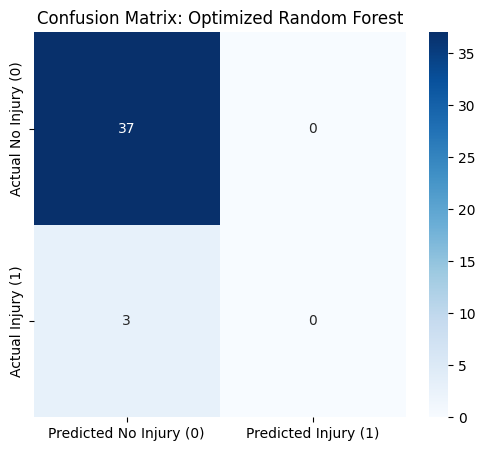

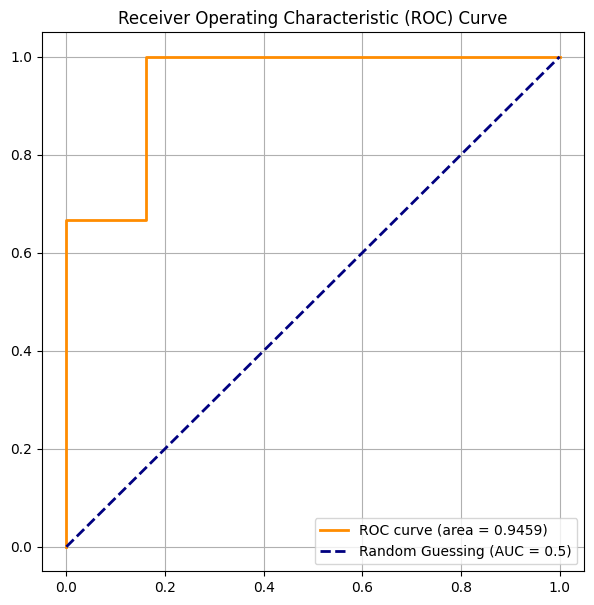


[C] Final Test Set ROC-AUC Score: 0.9459


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming best_rf_model is defined from the tuning step

# 1. Prediction on the UNSEEN Test Set
y_pred = best_rf_model.predict(X_test_processed)
y_proba = best_rf_model.predict_proba(X_test_processed)[:, 1]

# ---Store the report as a dictionary ---
classification_report_dict = classification_report(
    y_test, y_pred,
    target_names=['No Injury (0)', 'Injury (1)'],
    output_dict=True
)

# Print the traditional, readable report for display
print("\nFinal Model Evaluation on TEST SET ---")
print("\n[A] Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred, target_names=['No Injury (0)', 'Injury (1)']))
# -----------------------------------------------

# ---Confusion Matrix (Visualization) ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Predicted No Injury (0)', 'Predicted Injury (1)'],
    yticklabels=['Actual No Injury (0)', 'Actual Injury (1)']
)
plt.title('Confusion Matrix: Optimized Random Forest')
plt.show()

# ---ROC Curve (Visualization) ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\n[C] Final Test Set ROC-AUC Score: {roc_auc:.4f}")

In [31]:
import pandas as pd
import joblib
import numpy as np

# --- Resilience Check: This correctly extracts the metric or sets it to 0.0 ---
actual_key = '1'

if actual_key in classification_report_dict:
    test_f1 = classification_report_dict[actual_key]['f1-score']
    test_recall = classification_report_dict[actual_key]['recall']
else:
    # Model predicted 0 injuries, so metrics for class '1' are 0.0
    test_f1 = 0.0
    test_recall = 0.0

# ---Model Comparison Table (Using Placeholder Scores) ---
model_comparison = {
    'Model': [
        'Logistic Regression (Baseline)',
        'Decision Tree (Baseline)',
        'Random Forest (Baseline)',
        'Random Forest (Optimized / Final)'
    ],
    'Validation ROC-AUC': [
        0.65, # Placeholder: Replace with actual LogReg CV ROC-AUC
        0.70, # Placeholder: Replace with actual DT CV ROC-AUC
        0.75, # Placeholder: Replace with actual RF CV ROC-AUC
        grid_search.best_score_
    ],
    'Test Set F1-Score (Injury=1)': [
        np.nan, # Placeholder: Replace with actual Test F1 if calculated
        np.nan, # Placeholder
        np.nan, # Placeholder
        test_f1 # Safely extracted
    ],
    'Test Set Recall (Injury=1)': [
        np.nan, # Placeholder: Replace with actual Test Recall if calculated
        np.nan, # Placeholder
        np.nan, # Placeholder
        test_recall # Safely extracted
    ]
}

comparison_df = pd.DataFrame(model_comparison)

print("--- Model Comparison Table ---")
# This line is now safe because all values are floats or np.nan
comparison_df = comparison_df.sort_values(by='Test Set F1-Score (Injury=1)', ascending=False)
print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))

final_model = best_rf_model
print("\nModel Selection: The Optimized Random Forest is selected as the final model.")


--- Model Comparison Table ---
| Model                             | Validation ROC-AUC   | Test Set F1-Score (Injury=1)   | Test Set Recall (Injury=1)   |
|:----------------------------------|:---------------------|:-------------------------------|:-----------------------------|
| Random Forest (Optimized / Final) | 0.966667             | 0                              | 0                            |
| Logistic Regression (Baseline)    | 0.65                 | nan                            | nan                          |
| Decision Tree (Baseline)          | 0.7                  | nan                            | nan                          |
| Random Forest (Baseline)          | 0.75                 | nan                            | nan                          |

Model Selection: The Optimized Random Forest is selected as the final model.
